<a href="https://colab.research.google.com/github/darshit001/MerCari-DataAnalysis/blob/main/Mericari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')

In [5]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


In [6]:
test_df

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...
...,...,...,...,...,...,...,...
693354,693354,Quartz crystal on Flint stone,1,Home/Home Décor/Home Décor Accents,NaN,0,Flint/Quartz cluster. Self mined ✨measures 3x2...
693355,693355,It Cosmetics - Travel Bundle,1,Beauty/Makeup/Makeup Sets,IT Cosmetics,1,It Cosmetics travel bundle. Includes: Brow pow...
693356,693356,Galaxy S8 hard shell case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,1,New. Free shipping Basstop case
693357,693357,Hi low floral kimono,2,Women/Swimwear/Cover-Ups,NaN,0,Floral kimono. Tropical print. Open front. Hi ...


In [7]:
train_df.shape

(1482535, 8)

In [8]:
test_df.shape

(693359, 7)

In [9]:
train_df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [10]:
train_df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [11]:
test_df.columns

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')

In [12]:
train_df.isnull().sum()

,0
train_id,0
name,0
item_condition_id,0
category_name,6327
brand_name,632682
price,0
shipping,0
item_description,6


In [13]:
train_df["brand_name"].describe()

,brand_name
count,849853
unique,4809
top,PINK
freq,54088


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [15]:
train_df.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [16]:
print(train_df.shape)

(1482535, 8)


**Data Preprocessing**

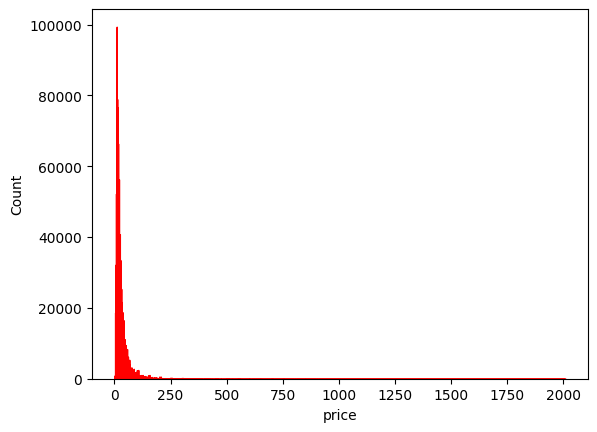

In [17]:
y_train_df = train_df['price']
plt.figure()
sns.histplot(y_train_df, element = 'poly', color = 'red')
plt.show()

Right skwed so perfome log trasformer

<function matplotlib.pyplot.show(close=None, block=None)>

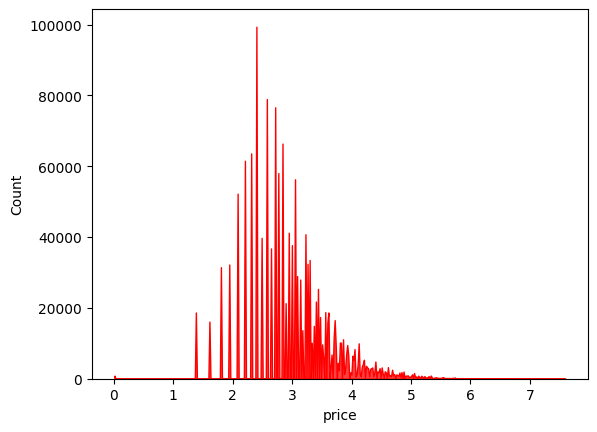

In [18]:
y_train_df = np.log1p(y_train_df) # log transformation
sns.histplot(y_train_df, element = 'poly', color = 'red')
plt.show

In [19]:
train_df['price'] = np.log1p(train_df['price'])
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity


In [20]:
train_df['shipping'].value_counts()

,count
shipping,
0,819435
1,663100


In [21]:
train_df['category_name'].value_counts()

,count
category_name,
"Women/Athletic Apparel/Pants, Tights, Leggings",60177
Women/Tops & Blouses/T-Shirts,46380
Beauty/Makeup/Face,34335
Beauty/Makeup/Lips,29910
Electronics/Video Games & Consoles/Games,26557
...,...
Vintage & Collectibles/Furniture/Storage,1
Home/Kids' Home Store/Nursery Furniture,1
Handmade/Patterns/Accessories,1


In [22]:
# split 'category_name' column

# train dataset
def split(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Null' , 'Null' , 'Null']

category_1 = []
category_2 = []
category_3 = []

for i in range(train_df.shape[0]):
    temp = split(train_df['category_name'][i])
    category_1.append(temp[0])
    category_2.append(temp[1])
    category_3.append(temp[2])

train_df['category_1'] = category_1
train_df['category_2'] = category_2
train_df['category_3'] = category_3

print('1st Category :', train_df['category_1'].value_counts())
print('2nd Category :', train_df['category_2'].nunique())
print('3rd Category :', train_df['category_3'].nunique())

1st Category : category_1
Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Null                        6327
Name: count, dtype: int64
2nd Category : 114
3rd Category : 871


In [23]:
# test dataset
category_1 = []
category_2 = []
category_3 = []

for i in range(test_df.shape[0]):
    temp = split(test_df['category_name'][i])
    category_1.append(temp[0])
    category_2.append(temp[1])
    category_3.append(temp[2])

test_df['category_1'] = category_1
test_df['category_2'] = category_2
test_df['category_3'] = category_3

print('1st Category :', test_df['category_1'].value_counts())
print('2nd Category :', test_df['category_2'].nunique())
print('3rd Category :', test_df['category_3'].nunique())

1st Category : category_1
Women                     310048
Beauty                     97265
Kids                       80225
Electronics                57679
Men                        44066
Home                       31966
Vintage & Collectibles     21410
Other                      21409
Handmade                   14335
Sports & Outdoors          11898
Null                        3058
Name: count, dtype: int64
2nd Category : 114
3rd Category : 834


In [24]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,3.044522,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,2.708050,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,2.564949,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,3.828641,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


**filling Null value**

In [25]:
train_df.isnull().sum()

,0
train_id,0
name,0
item_condition_id,0
category_name,6327
brand_name,632682
price,0
shipping,0
item_description,6
category_1,0
category_2,0


In [26]:
train_df['brand_name'] = train_df['brand_name'].fillna(value='Null')
train_df['category_name'] = train_df['category_name'].fillna(value='Null')
train_df['item_description'] = train_df['item_description'].fillna(value='Null')\

train_df.isnull().sum()

,0
train_id,0
name,0
item_condition_id,0
category_name,0
brand_name,0
price,0
shipping,0
item_description,0
category_1,0
category_2,0


In [27]:
test_df.isnull().sum()

,0
test_id,0
name,0
item_condition_id,0
category_name,3058
brand_name,295525
shipping,0
item_description,0
category_1,0
category_2,0
category_3,0


In [28]:
test_df['brand_name'] = test_df['brand_name'].fillna(value='Null')
test_df['category_name'] = test_df['category_name'].fillna(value='Null')
test_df['item_description'] = test_df['item_description'].fillna(value='Null')

test_df.isnull().sum()

,0
test_id,0
name,0
item_condition_id,0
category_name,0
brand_name,0
shipping,0
item_description,0
category_1,0
category_2,0
category_3,0


**Feature Encoding & Feature Vectorization**

In [29]:
# combine train dataset & test dataset
train_df_target = train_df['price']
train_df.drop(['price'],axis=1,inplace=True)

mercari_df = pd.concat([train_df, test_df])
mercari_df = mercari_df.drop(columns=['train_id', 'test_id'], axis = 1)

mercari_df

,name,item_condition_id,category_name,brand_name,shipping,item_description,category_1,category_2,category_3
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Null,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Null,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Null,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...
693354,Quartz crystal on Flint stone,1,Home/Home Décor/Home Décor Accents,Null,0,Flint/Quartz cluster. Self mined ✨measures 3x2...,Home,Home Décor,Home Décor Accents
693355,It Cosmetics - Travel Bundle,1,Beauty/Makeup/Makeup Sets,IT Cosmetics,1,It Cosmetics travel bundle. Includes: Brow pow...,Beauty,Makeup,Makeup Sets
693356,Galaxy S8 hard shell case,1,"Electronics/Cell Phones & Accessories/Cases, C...",Null,1,New. Free shipping Basstop case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins"
693357,Hi low floral kimono,2,Women/Swimwear/Cover-Ups,Null,0,Floral kimono. Tropical print. Open front. Hi ...,Women,Swimwear,Cover-Ups


In [30]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175894 entries, 0 to 693358
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   name               object
 1   item_condition_id  int64 
 2   category_name      object
 3   brand_name         object
 4   shipping           int64 
 5   item_description   object
 6   category_1         object
 7   category_2         object
 8   category_3         object
dtypes: int64(2), object(7)
memory usage: 166.0+ MB


In [31]:
mercari_df.shape

(2175894, 9)

In [32]:
# before vectorization (Count & TF-IDF) and encoding (ONE-HOT), memory need to be cleared
import gc
gc.collect()

3356

feature vectorization ( CountVectorizer(), TfidfVectorizer() )

In [33]:
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df['name'])

tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range= (1,3) , stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)

name vectorization shape: (2175894, 131042)
item_description vectorization shape: (2175894, 50000)


In [34]:
ohe = OneHotEncoder()

# why reshape()? series type change to two dimension
X_brand_name = ohe.fit_transform(mercari_df['brand_name'].values.reshape(-1, 1))
X_item_condition_id = ohe.fit_transform(mercari_df['item_condition_id'].values.reshape(-1, 1))
X_shipping = ohe.fit_transform(mercari_df['shipping'].values.reshape(-1, 1))
X_category_1 = ohe.fit_transform(mercari_df['category_1'].values.reshape(-1, 1))
X_category_2 = ohe.fit_transform(mercari_df['category_2'].values.reshape(-1, 1))
X_category_3 = ohe.fit_transform(mercari_df['category_3'].values.reshape(-1, 1))

In [35]:
print('brand encoding shape:', X_brand_name.shape)
print('item condition id encoding shape:', X_item_condition_id.shape)
print('shipping encoding shape:', X_shipping.shape)
print('category_1 encoding shape:', X_category_1.shape)
print('category_2 encoding shape:', X_category_2.shape)
print('category_3 encoding shape:', X_category_3.shape)

brand encoding shape: (2175894, 5290)
item condition id encoding shape: (2175894, 5)
shipping encoding shape: (2175894, 2)
category_1 encoding shape: (2175894, 11)
category_2 encoding shape: (2175894, 114)
category_3 encoding shape: (2175894, 883)


**Mercari Price Suggestion¶**

combining feature vectorized sparse matrix & one-hot encoded sparse matrix

In [36]:
from lightgbm import LGBMRegressor
from scipy.sparse import hstack
#h(orizontal) stack (column wise)


combined_matrix_train = (X_name[:1482535], X_descp[:1482535], X_brand_name[:1482535], X_item_condition_id[:1482535], X_shipping[:1482535],
                   X_category_1[:1482535], X_category_2[:1482535], X_category_3[:1482535])
X_train= hstack(combined_matrix_train).tocsr()

combined_matrix_test = (X_name[1482535:], X_descp[1482535:], X_brand_name[1482535:], X_item_condition_id[1482535:], X_shipping[1482535:],
                   X_category_1[1482535:], X_category_2[1482535:], X_category_3[1482535:])
X_test = hstack(combined_matrix_test).tocsr()


y_train = train_df_target

Ridge Regression

In [37]:
ridge = Ridge(solver = "lsqr", fit_intercept=False)

ridge.fit(X_train , y_train)
preds = ridge.predict(X_test)

preds

array([2.34246098, 2.47475007, 3.88283656, ..., 2.00374496, 2.72819011,
       2.61382333])

In [38]:
preds = np.expm1(preds)

In [39]:
finals = pd.DataFrame(columns = ["test_id", "price"])
finals["test_id"] = test_df["test_id"]
finals["price"] = preds
finals.to_csv('submission.csv', index = False, header = True)
finals.head()

,test_id,price
0,0,9.406816
1,1,10.878738
2,2,47.561768
3,3,17.185050
4,4,7.126872
